# IsoSolve: Integrate, clarify and consolidate isotopic measurements by MS and/or NMR

## 1. General information

This notebook is part of Supporting information of the following publication:
    
> IsoSolve: an integrative framework to improve isotopic coverage and consolidate isotopic measurements by MS and/or NMR. Millard <i>et al.</i>, 2021, [bioRxiv preprint](https://www.biorxiv.org/)

This notebook contains examples on IsoSolve usage, and reproduces the analysis detailed in the publication, including all equations and Figures 3-6.

More information can be found at the [IsoSolve git repository](https://github.com/MetaSys-LISBP/IsoSolve).

### Content

- [Prepare environment](#2.-Prepare-environment)
- [Examples: Integrate specific datasets for Alanine](#3.-Examples:-Integrate-specific-datasets-for-Alanine)
  - [Isotopic data collected by NMR (HSQC, C<sub>α</sub>; TOCSY, H<sub>α</sub>)](#3.1.-Integrate-isotopic-data-collected-by-NMR-(HSQC,-C%CE%B1;-TOCSY,-H%CE%B1)-to-reproduce-Equations-8-12-of-the-publication.)
  - [Isotopic data collected by NMR (HSQC, C<sub>α</sub>; TOCSY, H<sub>α</sub>) and MS (LC-MS, ion [M+H]<sup>+</sup>)](#3.2.-Integrate-isotopic-data-collected-by-NMR-(HSQC,-C%CE%B1;-TOCSY,-H%CE%B1)-and-MS-(LC-MS,-[M+H]+)-to-reproduce-Equations-17-23-of-the-publication.)
  - [Isotopic data collected by NMR (HSQC, C<sub>α</sub> and C<sub>β</sub>) and MS (LC-MS, ion [M+H]<sup>+</sup>)](#3.3.-Integrate-isotopic-data-collected-by-NMR-(HSQC,-C%CE%B1-and-C%CE%B2)-and-MS-(LC-MS,-ion-[M+H]+)-to-reproduce-Equations-31-38-of-the-publication.)
  - [All datasets](#3.4.-Integrate-all-datasets.)
- [Analyze all combinations of datasets for Alanine](#4.-Analyze-all-combinations-of-datasets-for-Alanine)
- [Determine isotopic coverage for all amino acids](#5.-Determine-isotopic-coverage-for-all-amino-acids)
- [Overview of integration results from different combinations of datasets for Alanine](#6.-Overview-of-integration-results-from-different-combinations-of-datasets-for-Alanine)
- [Detailed analysis of integration results for Alanine](#7.-Detailed-analysis-of-integration-results-for-Alanine)
- [Evaluate self-consistency of measurements](#8.-Evaluate-self-consistency-of-measurements)
- [Generate isotopically-resolved InChIs](#9.-Generate-isotopically-resolved-InChIs)

## 2. Prepare environment

#### Dependencies

The following Python packages are required:
  - numpy
  - pandas
  - matplotlib
  - seaborn

These packages can be installed by running the following command in a terminal:

```console
pip install --user X
```

where `X` is the package name.

#### Load packages

Import Python packages.

In [1]:
import sys, time, itertools, pickle
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# change Pandas option to display full (i.e. non-truncated) dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

Import IsoSolve.

In [2]:
import isosolve

Load functions to calculate metrics, create measurements-isotopomers mapping matrix, display results summary.

In [3]:
from misc import *

## 3. Examples: Integrate specific datasets for Alanine

Path of the file containing the relationships between measurements and the isotopic space for alanine.

In [4]:
dataset_file = "./data/ALA_mapping.tsv"

### 3.1. Integrate isotopic data collected by NMR (HSQC, C<sub>α</sub>; TOCSY, H<sub>α</sub>) to reproduce Equations 8-12 of the publication.

Integrate datasets (columns 1 and 4 of the measurements mapping file).

In [5]:
res_test_1 = isosolve.main(mm=dataset_file, colsel=[1,4])

Display results.

In [6]:
print_summary(res_test_1)

**Equations**

,isotopomer,equation
0,000,e - 001 - 100 - 101
1,010,a*f
2,011,b*f
3,110,c*f
4,111,d*f


**Summary**

Number of undefined isotopic species: 4

&nbsp; &nbsp; *Undefined isotopic species: 000, 001, 100, 101*

Number of redundant measurements: 0

### 3.2. Integrate isotopic data collected by NMR (HSQC, C<sub>α</sub>; TOCSY, H<sub>α</sub>) and MS (LC-MS, [M+H]<sup>+</sup>) to reproduce Equations 17-23 of the publication.

Integrate datasets (columns 1, 4 and 8 of the measurements mapping file).

In [7]:
res_test_2 = isosolve.main(mm=dataset_file, colsel=[1,4,8])

Display equations.

In [8]:
print_summary(res_test_2)

**Equations**

,isotopomer,equation
0,000,g
1,001,-a*f + h - 100
2,101,a*f + e - g - h
3,010,a*f
4,011,b*f
5,110,f*(c + d) - j
6,111,j


**Summary**

Number of undefined isotopic species: 2

&nbsp; &nbsp; *Undefined isotopic species: 001, 100*

Number of redundant measurements: 1

&nbsp; &nbsp; *Redundant measurements: d*

### 3.3. Integrate isotopic data collected by NMR (HSQC, C<sub>α</sub> and C<sub>β</sub>) and MS (LC-MS, ion [M+H]<sup>+</sup>) to reproduce Equations 31-38 of the publication.

Integrate datasets (columns 1, 2 and 8 of the measurements mapping file).

In [9]:
res_test_3 = isosolve.main(mm=dataset_file, colsel=[1,2,8])

Display equations.

In [10]:
print_summary(res_test_3)

**Equations**

,isotopomer,equation
0,000,g
1,001,-i - j*(1 - (b + c*l + d)/(d*l))
2,100,h + i + j*(1 - (b + d + l*(a + c))/(d*l))
3,101,i - j*(b + c)/d
4,010,a*j/d
5,011,b*j/d
6,110,c*j/d
7,111,j


**Summary**

Number of undefined isotopic species: 0

Number of redundant measurements: 0

### 3.4. Integrate all datasets.

Integrate datasets (all columns of the measurements mapping file).

In [11]:
res_test_4 = isosolve.main(mm=dataset_file, colsel=[1,2,3,4,5,6,7,8])

Display equations.

In [12]:
print_summary(res_test_4)

**Equations**

,isotopomer,equation
0,000,g
1,001,f*n + g + h - j - t
2,100,-g + o
3,101,-f*n + i + 2*j - q
4,010,-f*n + j - o + t
5,011,-j + q
6,110,f*n - j
7,111,j


**Summary**

Number of undefined isotopic species: 0

Number of redundant measurements: 10

&nbsp; &nbsp; *Redundant measurements: a, b, c, d, e, f, k, l, r, s*

## 4. Analyze all combinations of datasets for Alanine

This code computes all combinations of isotopic datasets that can be collected for alanine and reproduces Figure 3 of the publication.

Combinations are evaluated based on the following metrics:
- number of <b>isotopomers</b>, <b>cumomers</b> and <b>EMUs</b> that can be quantified individually,
- number of <b>redundant measurements</b>,
- number of <b>additional isotopomers</b> that can be quantified individually via data integration.

Path of the file containing the relationships between measurements and the isotopic space for alanine.

In [13]:
dataset_file = "./data/ALA_mapping.tsv"

Define all combinations of methods.

In [14]:
# list of datasets/methods
measurement_methods = ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8"]

# define all combinations
all_combinations = []
for r in range(1, len(measurement_methods) + 1):
    combinations_object = itertools.combinations(range(0, len(measurement_methods)), r)
    all_combinations += list(combinations_object)

Integrate datasets for all combinations and calculate evaluation metrics.

In [15]:
# create empty panda dataframe
metrics = ['nb_id_ipm', 'nb_id_cumo', 'nb_id_emu', 'nb_rdd_meas', 'nb_add_ipm']
res_hm = pd.DataFrame(columns = measurement_methods + metrics)

# compute all combinations of datasets
for i in range(len(all_combinations)):
    
    # define columns (i.e. datasets) to include
    print("combination: {}/{}".format(i+1, len(all_combinations)))
    columns = [j+1 for j in all_combinations[i]]
    print(" (datasets included: {})".format(columns))
    
    # integrate datasets
    res_comb = isosolve.main(mm=dataset_file, colsel=columns, fast=True)
    
    # calculate evaluation metrics
    #   number of individual isotopomers that can be quantified
    nb_id_ipm = len(res_comb["metrics"]["idef"])
    #   number of individual cumomers that can be quantified
    nb_id_cumo = len(res_comb["metrics"]["idef_c"])
    #   number of individual EMUs that can be quantified
    nb_id_emu = len([1 for i,j in res_comb["metrics"]["idef_e"].items() if len(j) == i.count("E")+1])
    #   number of redundant measurements
    nb_rdd_meas = len(res_comb["rdn_meas"])
    #   information gain (additional isotopomers) brought by data integration
    nb_add_ipm = nb_id_ipm - (2 if 7 in all_combinations[i] else 0)
    
    # fill the results dataframe
    #   datasets included
    row_tmp = [1 if j in all_combinations[i] else 0 for j in range(len(measurement_methods))]
    #   metrics
    row_tmp += [nb_id_ipm, nb_id_cumo, nb_id_emu, nb_rdd_meas, nb_add_ipm]
    #   add row to dataframe
    res_hm.loc[i] = row_tmp

# change dataframe type to 'int' (required for plotting)
res_hm = res_hm.astype('int')

combination: 1/255
 (datasets included: [1])
combination: 2/255
 (datasets included: [2])
combination: 3/255
 (datasets included: [3])
combination: 4/255
 (datasets included: [4])
combination: 5/255
 (datasets included: [5])
combination: 6/255
 (datasets included: [6])
combination: 7/255
 (datasets included: [7])
combination: 8/255
 (datasets included: [8])
combination: 9/255
 (datasets included: [1, 2])
combination: 10/255
 (datasets included: [1, 3])
combination: 11/255
 (datasets included: [1, 4])
combination: 12/255
 (datasets included: [1, 5])
combination: 13/255
 (datasets included: [1, 6])
combination: 14/255
 (datasets included: [1, 7])
combination: 15/255
 (datasets included: [1, 8])
combination: 16/255
 (datasets included: [2, 3])
combination: 17/255
 (datasets included: [2, 4])
combination: 18/255
 (datasets included: [2, 5])
combination: 19/255
 (datasets included: [2, 6])
combination: 20/255
 (datasets included: [2, 7])
combination: 21/255
 (datasets included: [2, 8])
comb

Display results.

In [16]:
display(res_hm)

,D1,D2,D3,D4,D5,D6,D7,D8,nb_id_ipm,nb_id_cumo,nb_id_emu,nb_rdd_meas,nb_add_ipm
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,1,0,0,0,0,1,1,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,1,1,0,0
7,0,0,0,0,0,0,0,1,2,1,1,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0,0,0


Plot results as an heatmap (Figure 3).

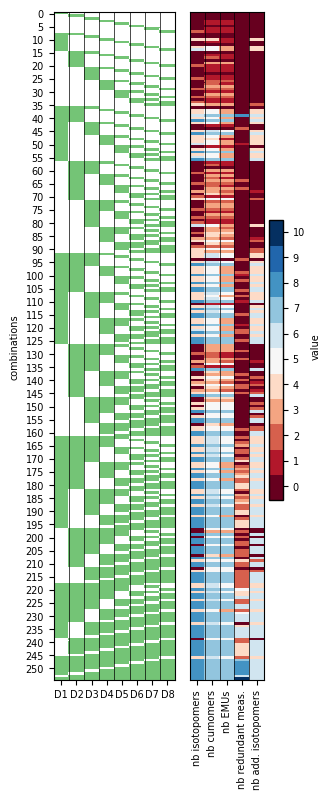

In [17]:
# set font size
plt.rcdefaults
plt.rcParams.update({'font.size': 7})

# create figure and panels
fig, ax = plt.subplots(1, 2, figsize=(3.3, 8.0), dpi=100.0, gridspec_kw={'width_ratios': [1.3, 1]})

# panel 1 (combinations of datasets)
h1 = sns.heatmap(res_hm[measurement_methods],
                 cmap=['white', '#74C476'],
                 cbar=False,
                 ax=ax[0],
                 xticklabels=True)

#   add border to heatmap
for _, spine in h1.spines.items():
    spine.set_visible(True)
h1.set_ylabel('combinations')

#   add lines between columns
ax[0].vlines(range(len(measurement_methods)), *ax[0].get_ylim(), lw=0.5, colors="black")

# panel 2 (metrics)
data = res_hm[metrics]
cmap = plt.get_cmap('RdBu', 1 + max(data.max()) - min(data.min()))
x_axis_labels = ['nb isotopomers', 'nb cumomers', 'nb EMUs', 'nb redundant meas.', 'nb add. isotopomers']
h2 = sns.heatmap(data,
                 cmap=cmap,
                 ax=ax[1],
                 yticklabels=False,
                 xticklabels=x_axis_labels)

#   add colorbar (with centered ticks)
c_bar = ax[1].collections[0].colorbar
c_bar.ax.set_ylim(0, 1 + max(data.max()))
c_bar.set_ticks([i*max(data.max())/(max(data.max())+1)+0.5 for i in range(0, 1 + max(data.max()))])
c_bar.set_ticklabels([i for i in range(0, 1 + max(data.max()))])
c_bar.outline.set_linewidth(1)
c_bar.set_label('value')

#   add lines between columns
ax[1].vlines(range(len(metrics)), *ax[1].get_ylim(), lw=0.5, colors="black")

#   add border to heatmap
for _, spine in h2.spines.items():
    spine.set_visible(True)
    
#   adjust space between panels
fig.tight_layout(pad=1.0)

# save figure
plt.savefig("./results/Figure_3.jpeg", dpi=300.0, bbox_inches='tight', pad_inches=0.05)

# display figure
plt.show()

Number of combinations which do not bring any novel isotopic information.

In [18]:
print(len(res_hm[res_hm['nb_id_ipm'] == 0]))

74


Number of combinations with full isotopic coverage.

In [19]:
print(len(res_hm[res_hm['nb_id_ipm'] == 8]))

87


Save results to an excel file.

In [20]:
res_hm.to_excel("./results/res_combinations_ALA.xlsx")

## 5. Determine isotopic coverage for all amino acids

This code integrates isotopic measurements collected by NMR and MS for all amino acids and determines the number of isotopomers, cumomers and EMUs that can be quantified. It reproduces Figure 4 of the publication.

Experimental datasets can be easily defined in a dictionary to generate the isotopomers-measurements mapping dataframe. Dictionary keys are dataset name, and values represent measurements which can be defined as:

- `dict()` where keys are isotopomers or cumomers and values are measurements symbol, this is typically used to map NMR datasets
- `str()` of elementary metabolite units, this is typically used to map MS datasets
- `tuple()` where the first value is the elementary metabolite unit of the parent ion and the second value is the elementary metabolite unit of the daughter ion, this is typically used to map MS/MS datasets with established parent/daughter ions relationships.

In [21]:
# Define measurements
list_datasets_example = {"NMR_1":{"x01":"a", "x11":"b", "110":"c"},
                         "NMR_2":{"010":"d", "110":"d", "011":"e", "111":"f"},
                         "GC-MS":"xEE",
                         "LC-MS":"EEE",
                         "MS_MS":("xEE", "xEx")}

# Generate mapping dataframe
mapping_example = build_mapping_dataframe(list_datasets_example)

display(mapping_example)

,NMR_1,NMR_2,GC-MS,LC-MS,MS_MS
000,NaN,NaN,aa_m0,ab_m0,ac_m0_0
100,NaN,NaN,aa_m0,ab_m1,ac_m0_0
010,NaN,d,aa_m1,ab_m1,ac_m1_1
001,a,NaN,aa_m1,ab_m1,ac_m1_0
110,c,d,aa_m1,ab_m2,ac_m1_1
101,a,NaN,aa_m1,ab_m2,ac_m1_0
011,b,e,aa_m2,ab_m2,ac_m2_1
111,b,f,aa_m2,ab_m3,ac_m2_1


List of accessible isotopic measurements for all amino acids.

In [22]:
amino_acids_datasets = {"ALA":{'HSQC_Ca': {'010': 'a1', '011': 'a2', '110': 'a3', '111': 'a4'},
                               'HSQC_Cb': {'x01': 'b1', 'x11': 'b2'},
                               'HACO': {'10x': 'c1', '11x': 'c2'},
                               'TOCSY_Ha': {'x0x': 'd1','x1x': 'd2'},
                               'TOCSY_Hb': {'xx0': 'e1', 'xx1': 'e2'},
                               'HNCA': {'01x': 'f1', '11x': 'f2'},
                               'GC-MS': 'xEE',
                               'LC-MS': 'EEE'},
                        "ASP":{'HSQC_Ca': {'010x': 'a', '011x': 'b', '110x': 'c', '111x': 'd'},
                               'HSQC_Cb': {'x010': 'k', 'x110': 'l1', 'x011': 'l2', 'x111': 'l'},
                               'HACO': {'10xx': 'r', '11xx': 's'},
                               'TOCSY_Ha': {'x0xx': 'e','x1xx': 'f'},
                               'TOCSY_Hb': {'xx0x': 't', 'xx1x': 'u'},
                               'HNCA': {'01xx': 'm', '11xx': 'n'},
                               'GC-MS': 'xEEE',
                               'LC-MS': 'EEEE'},
                        "GLU":{'HSQC_Ca': {'010xx': 'a1', '011xx': 'a2', '110xx': 'a3', '111xx': 'a4'},
                               'HSQC_Cb': {'x010x': 'b1', 'x110x': 'b2', 'x011x': 'b2', 'x111x': 'b3'},
                               'HSQC_Cg': {'xx010': 'c1', 'xx110': 'c2', 'xx011': 'c3', 'xx111': 'c4'},
                               'HACO': {'10xxx': 'd1', '11xxx': 'd2'},
                               'TOCSY_Ha': {'x0xxx': 'e1','x1xxx': 'e2'},
                               'TOCSY_Hb': {'xx0xx': 'f1', 'xx1xx': 'f2'},
                               'HNCA': {'01xxx': 'g1', '11xxx': 'g2'},
                               'GC-MS': 'xEEEE',
                               'LC-MS': 'EEEEE'},
                        "GLY":{'HSQC_Ca': {'01': 'a1', '11': 'a2'},
                               'HACO': {'10': 'b1', '11': 'b2'},
                               'TOCSY_Ha': {'x0': 'c1','x1': 'c2'},
                               'GC-MS': 'xE',
                               'LC-MS': 'EE'},
                        "HIS":{'HSQC_Ca': {'010xxx': 'a1', '011xxx': 'a2', '110xxx': 'a3', '111xxx': 'a4'},
                               'HSQC_Cb': {'x010xx': 'b1', 'x110xx': 'b2', 'x011xx': 'b3', 'x111xx': 'b4'},
                               'HSQC_Cd': {'xxx01x': 'c1', 'xxx11x': 'c2'},
                               'TOCSY_Ha': {'x0xxxx': 'e1','x1xxxx': 'e2'},
                               'TOCSY_Hd': {'xxxx0x': 'f1', 'xxxx1x': 'f2'},
                               'TOCSY_He': {'xxxxx0': 'g1', 'xxxxx1': 'g2'},
                               'LC-MS': 'EEEEEE'},
                        "ILE":{'HSQC_Ca': {'010xxx': 'a1', '011xxx': 'a2', '110xxx': 'a3', '111xxx': 'a4'},
                               'HSQC_Cg1': {'xx0x10': 'b1', 'xx1x10': 'b2', 'xx0x11': 'b2', 'xx1x11': 'b3'},
                               'HSQC_Cg2': {'xx01xx': 'c1', 'xx11xx': 'c2'},
                               'HSQC_Cd': {'xxxx01': 'd1', 'xxxx11': 'd2'},
                               'HACO': {'10xxxx': 'e1', '11xxxx': 'e2'},
                               'TOCSY_Ha': {'x0xxxx': 'f1', 'x1xxxx': 'f2'},
                               'TOCSY_Hb': {'xx0xxx': 'g1', 'xx1xxx': 'g2'},
                               'TOCSY_Hg': {'xxxx0x': 'h1', 'xxxx1x': 'h2'},
                               'TOCSY_Hd': {'xxxxx0': 'i1', 'xxxxx1': 'i2'},
                               'HNCA': {'01xxxx': 'j1', '11xxxx': 'j2'},
                               'LC-MS': 'EEEEEE',
                               'GC-MS': 'xEEEEE'},
                        "LEU":{'HSQC_Ca': {'010xxx': 'a1', '011xxx': 'a2', '110xxx': 'a3', '111xxx': 'a4'},
                               'HSQC_Cb': {'x010xx': 'b1', 'x110xx': 'b2', 'x011xx': 'b2', 'x111xx': 'b3'},
                               'HSQC_Cd': {'xxx010': 'c1', 'xxx011': 'c1', 'xxx001': 'c1', 'xxx110': 'c2', 'xxx111': 'c2', 'xxx101': 'c2'},
                               'HACO': {'10xxxx': 'd1', '11xxxx': 'd2'},
                               'TOCSY_Ha': {'x0xxxx': 'e1', 'x1xxxx': 'e2'},
                               'TOCSY_Hg': {'xxx0xx': 'f1', 'xxx1x0': 'f2'},
                               'HNCA': {'01xxxx': 'g1', '11xxxx': 'g2'},
                               'LC-MS': 'EEEEEE',
                               'GC-MS': 'xEEEEE'},
                        "LYS":{'HSQC_Cb': {'x010xx': 'a1', 'x110xx': 'a2', 'x011xx': 'a2', 'x111xx': 'a3'},
                               'HSQC_Cd': {'xxx010': 'b1', 'xxx110': 'b2', 'xxx011': 'b2', 'xxx111': 'b3'},
                               'HSQC_Ce': {'xxxx01': 'c1', 'xxxx11': 'c2'},
                               'TOCSY_Ha': {'x0xxxx': 'd1', 'x1xxxx': 'd2'},
                               'TOCSY_Hd': {'xxxx0x': 'e1', 'xxxx1x': 'e2'},
                               'TOCSY_He': {'xxxxx0': 'f1', 'xxxxx1': 'f2'},
                               'LC-MS': 'EEEEEE'},
                        "PRO":{'HSQC_Ca': {'010xx': 'a1', '011xx': 'a2', '110xx': 'a3', '111xx': 'a4'},
                               'HSQC_Cb': {'x010x': 'b1', 'x110x': 'b2', 'x011x': 'b2', 'x111x': 'b3'},
                               'HSQC_Cg': {'xx010': 'c1', 'xx110': 'c2', 'xx011': 'c2', 'xx111': 'c3'},
                               'HSQC_Cd': {'xxx01': 'd1', 'xxx11': 'd2'},
                               'TOCSY_Ha': {'x0xxx': 'e1','x1xxx': 'e2'},
                               'TOCSY_Hb': {'xx0xx': 'f1', 'xx1xx': 'f2'},
                               'TOCSY_Hg': {'xxx0x': 'g1', 'xxx1x': 'g2'},
                               'TOCSY_Hd': {'xxxx0': 'h1', 'xxxx1': 'h2'},
                               'LC-MS': 'EEEEE'},
                        "SER":{'HSQC_Ca': {'010': 'a1', '011': 'a2', '110': 'a3', '111': 'a4'},
                               'HSQC_Cb': {'x01': 'b1', 'x11': 'b2'},
                               'HACO': {'10x': 'c1', '11x': 'c2'},
                               'TOCSY_Ha': {'x0x': 'd1','x1x': 'd2'},
                               'TOCSY_Hb': {'xx0': 'e1', 'xx1': 'e2'},
                               'HNCA': {'01x': 'f1', '11x': 'f2'},
                               'GC-MS': 'xEE',
                               'LC-MS': 'EEE'},
                        "THR":{'HSQC_Ca': {'010x': 'a1', '011x': 'a2', '110x': 'a3', '111x': 'a4'},
                               'HSQC_Cb': {'x010': 'b1', 'x110': 'b2', 'x011': 'b2', 'x111': 'b3'},
                               'HSQC_Cg': {'xx01': 'c1', 'xx11': 'c2'},
                               'HACO': {'10xx': 'd1', '11xx': 'd2'},
                               'TOCSY_Ha': {'x0xx': 'e1','x1xx': 'e2'},
                               'TOCSY_Hb': {'xx0x': 'f1', 'xx1x': 'f2'},
                               'JRES_Hg': {'xxx0': 'g1', 'xxx1': 'g2'},
                               'HNCA': {'01xx': 'h1', '11xx': 'h2'},
                               'GC-MS': 'xEEE',
                               'LC-MS': 'EEEE'},
                        "VAL":{'HSQC_Ca': {'010xx': 'a1', '011xx': 'a2', '110xx': 'a3', '111xx': 'a4'},
                               'HSQC_Cb': {'x0100': 'b1', 'x0110': 'b2', 'x0101': 'b2', 'x1100': 'b2', 'x1110': 'b3', 'x1101': 'b3', 'x0111': 'b3', 'x1111': 'b4'},
                               'HSQC_Cg': {'xx010': 'c1', 'xx001': 'c1', 'xx110': 'c2', 'xx101': 'c2'},
                               'HACO': {'10xxx': 'd1', '11xxx': 'd2'},
                               'TOCSY_Ha': {'x0xxx': 'e1','x1xxx': 'e2'},
                               'TOCSY_Hb': {'xx0xx': 'f1', 'xx1xx': 'f2'},
                               'HNCA': {'01xxx': 'g1', '11xxx': 'g2'},
                               'GC-MS': 'xEEEE',
                               'LC-MS': 'EEEEE'},
                        "PHE":{'HSQC_Ca': {'010xxxxxx': 'a1', '011xxxxxx': 'a2', '110xxxxxx': 'a3', '111xxxxxx': 'a4'},
                               'HSQC_Cb': {'x010xxxxx': 'b1', 'x011xxxxx': 'b2', 'x110xxxxx': 'b3', 'x111xxxxx': 'b4'},
                               'HSQC_Cd': {'xxx010xxx': 'c1', 'xxx011xxx': 'c2', 'xxx110xxx': 'c3', 'xxx111xxx': 'c4'},
                               'HSQC_Ce': {'xxxx010xx': 'd1', 'xxxx011xx': 'd2', 'xxxx110xx': 'd3', 'xxxx111xx': 'd4'},
                               'HACO': {'10xxxxxxx': 'e1', '11xxxxxxx': 'e2'},
                               'JRES_Ha': {'x0xxxxxxx': 'f1', 'x1xxxxxxx': 'f2'},
                               'JRES_Hb': {'xx0xxxxxx': 'g1', 'xx1xxxxxx': 'g2'},
                               'JRES_Hd': {'xxxx0xxxx': 'h1', 'xxxx1xxxx': 'h2'},
                               'JRES_He': {'xxxxx0xxx': 'i1', 'xxxxx1xxx': 'i2'},
                               'HNCA': {'01xxxxxxx': 'j1', '11xxxxxxx': 'j2'},
                               'LC-MS': 'EEEEEEEEE',
                               'GC-MS_1': 'xEEEEEEEE',
                               'GC-MS_2': 'EExxxxxxx'},
                        "ARG":{'HSQC_Cb': {'x010xx': 'a1', 'x110xx': 'a2', 'x011xx': 'a2', 'x111xx': 'a3'},
                               'HSQC_Cd': {'xxx01x': 'b1', 'xxx11x': 'b2'},
                               'TOCSY_Ha': {'x0xxxx': 'c1', 'x1xxxx': 'c2'},
                               'TOCSY_Hd': {'xxxx0x': 'd1', 'xxxx1x': 'd2'},
                               'LC-MS': 'EEEEEE'},
                        "TYR":{'HSQC_Cb': {'x010xxxxx': 'b1', 'x011xxxxx': 'b2', 'x110xxxxx': 'b2', 'x111xxxxx': 'b3'},
                               'HSQC_Cd': {'xxx010xxx': 'c1', 'xxx011xxx': 'c2', 'xxx110xxx': 'c2', 'xxx111xxx': 'c3'},
                               'HSQC_Ce': {'xxxx010xx': 'd1', 'xxxx011xx': 'd2', 'xxxx110xx': 'd2', 'xxxx111xx': 'd3'},
                               'JRES_Ha': {'x0xxxxxxx': 'f1', 'x1xxxxxxx': 'f2'},
                               'JRES_Hb': {'xx0xxxxxx': 'g1', 'xx1xxxxxx': 'g2'},
                               'JRES_Hd': {'xxxx0xxxx': 'h1', 'xxxx1xxxx': 'h2'},
                               'JRES_He': {'xxxxx0xxx': 'i1', 'xxxxx1xxx': 'i2'},
                               'LC-MS': 'EEEEEEEEE',
                               'GC-MS': 'EExxxxxxx'},
                        "MET":{'HSQC_Ca': {'010xx': 'a1', '011xx': 'a2', '110xx': 'a3', '111xx': 'a4'},
                               'HACO': {'10xxx': 'd1', '11xxx': 'd2'},
                               'TOCSY_Ha': {'x0xxx': 'e1','x1xxx': 'e2'},
                               'TOCSY_Hg': {'xxx0x': 'f1', 'xxx1x': 'f2'},
                               'TOCSY_He': {'xxxx0': 'h1', 'xxxx1': 'h2'},
                               'HNCA': {'01xxx': 'g1', '11xxx': 'g2'},
                               'GC-MS': 'xEEEE',
                               'LC-MS': 'EEEEE'}}


Calculate isotopic coverage for all amino acids.

**Notes**:
  - Processing is fast for small amino acids but can take a few dozen minutes for larger molecules (e.g. PHE and TYR), hence results are saved in pickle files to facilitate data analysis. Pre-calculated results files are provided with this notebook. Uncomment the following code to re-run the calculation.
  - Here we use the flag `fast=True`, which makes the calculation faster by skipping some simplication steps. We strongly recommand using this flag to reduce calculation time.

In [23]:
#import pickle

#for k,v in amino_acids_datasets.items():
    
#    # generate mapping table
#    print(k)
#    mm = build_mapping_dataframe(v)
#    display(mm)
    
#    # integrate datasets
#    res_comb = isosolve.main(mm=mm, fast=True)
    
#    # save results in a pickle file
#    with open("./results/coverage_" + k + "_res.pkl", "wb") as f:
#        pickle.dump(res_comb, f)

Load results file and calculate isotopic coverage.

In [24]:
import pickle

# read calculation results from pickle files and determine the number of identifiable species
res = {}
for fi in amino_acids_datasets.keys():
    with open("./results/coverage_" + fi + "_res.pkl", "rb") as f:
        tmp = pickle.load(f)
    p_ip = len(tmp["metrics"]["idef"])
    p_c = len(tmp["metrics"]["idef_c"])
    p_e = len([1 for i,j in tmp["metrics"]["idef_e"].items() if len(j) == i.count("E")+1])
    res[fi] = {"identifiable":{"isotopomers":p_ip, "cumomers":p_c, "emus":p_e},
               "total":{"isotopomers":len(tmp["xbc"]), "cumomers":len(tmp["cusol"]), "emus":len(tmp["emusol"])}}

# parse results to extract isotopomers, cumomers and EMUs for all amino acids
list_files = ["GLY", "ALA", "SER", "ASP", "THR", "GLU", "MET", "PRO", "VAL", "ARG", "HIS", "LEU", "ILE", "LYS", "PHE", "TYR"]

print("Number of identifable isotopomers, cumomers and EMUs:")
p_ip = get_coverage(res, list_files)
display(p_ip)

print("Relative isotopic coverage for isotopomers, cumomers and EMUs:")
p_ip_rel = get_coverage_relative(res, list_files)
display(p_ip_rel)

Number of identifable isotopomers, cumomers and EMUs:


,amino_acid,isotopomers,cumomers,emus
0,GLY,4,3,3
1,ALA,8,7,7
2,SER,8,7,7
3,ASP,6,11,10
4,THR,6,11,10
5,GLU,4,12,8
6,MET,4,10,9
7,PRO,2,13,10
8,VAL,4,9,8
9,ARG,2,4,3


Relative isotopic coverage for isotopomers, cumomers and EMUs:


,amino_acid,isotopomers,cumomers,emus
0,GLY,100.000000,100.000000,100.000000
1,ALA,100.000000,100.000000,100.000000
2,SER,100.000000,100.000000,100.000000
3,ASP,37.500000,73.333333,66.666667
4,THR,37.500000,73.333333,66.666667
5,GLU,12.500000,38.709677,25.806452
6,MET,12.500000,32.258065,29.032258
7,PRO,6.250000,41.935484,32.258065
8,VAL,12.500000,29.032258,25.806452
9,ARG,3.125000,6.349206,4.761905


Plot results to generate Figure 6.

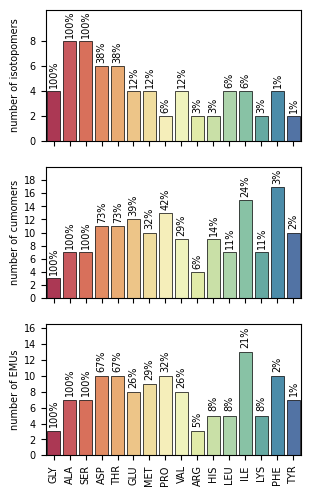

In [25]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import math

# set font size
plt.rcdefaults
plt.rcParams.update({'font.size': 6})
plt.rcParams.update({"axes.labelsize": 6})
sns.set_style({'axes.color':'black'})

# initialize plot
plt.figure(3, figsize=(3.3, 5.9), dpi=100.0)
the_grid = GridSpec(3, 1)

# plot isotopomers
plt.subplot(the_grid[0, 0],  title='')
ax = sns.barplot(x='amino_acid', y='isotopomers', data=p_ip, palette='Spectral', edgecolor="black", linewidth=0.5)
plt.ylabel("number of isotopomers", fontsize = 7)
plt.xlabel("")
plt.yticks([0,2,4,6,8])
plt.ylim(0, 10.5)
ax.set(xticklabels=[])
ax.tick_params(labelsize=7)
for p in ax.patches:
    ax.text(p.get_x()+0.1, p.get_height()+0.4, "{:0.0f}%".format(max(1, p_ip_rel.iloc[math.ceil(p.get_x())]['isotopomers'])), fontsize=7, rotation=90)
ax.get_yaxis().set_label_coords(-0.1,0.5)

# plot cumomers
plt.subplot(the_grid[1, 0], title='')
ax2 = sns.barplot(x='amino_acid', y='cumomers', data=p_ip, palette='Spectral', edgecolor="black", linewidth=0.5)
plt.ylabel("number of cumomers", fontsize = 7)
plt.xlabel("")
plt.yticks([0,2,4,6,8,10,12,14,16,18])
plt.ylim(0, 20)
ax2.set(xticklabels=[])
ax2.tick_params(labelsize=7)
for p in ax2.patches:
    ax2.text(p.get_x()+0.1, p.get_height()+0.8, "{:0.0f}%".format(p_ip_rel.iloc[math.ceil(p.get_x())]['cumomers']), fontsize=7, rotation=90)
ax2.get_yaxis().set_label_coords(-0.1,0.5)

# plot EMUs
plt.subplot(the_grid[2, 0], title='')
ax3 = sns.barplot(x='amino_acid', y='emus', data=p_ip, palette='Spectral', edgecolor="black", linewidth=0.5)
plt.ylabel("number of EMUs", fontsize = 7)
plt.xlabel("")
plt.yticks([0,2,4,6,8,10,12,14,16])
plt.ylim(0, 16.5)
ax3.tick_params(labelsize=7)
ax3.set_xticklabels(list_files, rotation=90)
for p in ax3.patches:
    ax3.text(p.get_x()+0.1, p.get_height()+0.8, "{:0.0f}%".format(p_ip_rel.iloc[math.ceil(p.get_x())]['emus']), fontsize=7, rotation=90)
ax3.get_yaxis().set_label_coords(-0.1,0.5)

# save figure
plt.savefig("./results/Figure_4.jpeg", dpi=300.0, bbox_inches='tight', pad_inches=0.05)

# display figure
plt.show()

## 6. Overview of integration results from different combinations of datasets for Alanine

This code performs data integration for different combinations of isotopic measurements of Alanine collected by NMR and MS and calculates evaluation metrics for each combination. It reproduces Figure 5 of the publication.

Measurements datafile.

In [26]:
dataset_file = "./data/ALA_mapping.tsv"
measurements_file = "./data/ALA_measurements.tsv"

Define combinations of datasets.

In [27]:
# list of datasets/methods
measurement_methods = ['HSQC_C'+chr(945)+" (D1)", 'HSQC_C'+chr(946)+" (D2)", 'HACO-DIPSY (D3)', 'TOCSY_H'+chr(945)+" (D4)", 'TOCSY_H'+chr(946)+" (D5)", 'HNCA (D6)', 'GC-MS (D7)', 'LC-MS (D8)']

# define all combinations
all_combinations = []
for r in range(1, len(measurement_methods) + 1):
    combinations_object = itertools.combinations(range(0, len(measurement_methods)), r)
    all_combinations += list(combinations_object)

Integrate measurements.

In [28]:
# create empty dataframe
metrics_num = ['mean_error_iso', 'mean_sd_iso', 'mean_error_emu', 'mean_sd_emu', 'mean_error_cumo', 'mean_sd_cumo']
res_num = pd.DataFrame(columns = measurement_methods + metrics_num)

ab_13C, err_13C = 0.508, 0.01

# integrate measurements for all combinations of datasets
for i in range(len(all_combinations)):
    
    # define columns (i.e. datasets) to include
    columns = [j+1 for j in all_combinations[i]]
    
    # integrate datasets
    res_comb = isosolve.main(mm=dataset_file, colsel=columns, data=measurements_file)
    
    # compute evaluation metrics if all isotopomers are quantifiable
    if len(res_comb["metrics"]["idef"]) == len(res_comb["xbc"]):
        print("combination: {}/{}".format(i+1, len(all_combinations)))
        print(" (datasets included: {})".format(columns))
        # calculate evaluation metrics
        me = calculate_metrics(res_comb, ab_13C, err_13C)
        # fill results dataframe
        res_num.loc[i] = [1 if j in all_combinations[i] else 0 for j in range(len(measurement_methods))] + [me[i] for i in metrics_num]

# change dataframe type to 'float' (required for plotting)
res_num = res_num.astype('float')

combination: 42/255
 (datasets included: [1, 2, 8])
combination: 47/255
 (datasets included: [1, 3, 8])
combination: 54/255
 (datasets included: [1, 5, 8])
combination: 57/255
 (datasets included: [1, 7, 8])
combination: 97/255
 (datasets included: [1, 2, 3, 8])
combination: 101/255
 (datasets included: [1, 2, 4, 8])
combination: 104/255
 (datasets included: [1, 2, 5, 8])
combination: 106/255
 (datasets included: [1, 2, 6, 8])
combination: 107/255
 (datasets included: [1, 2, 7, 8])
combination: 111/255
 (datasets included: [1, 3, 4, 8])
combination: 114/255
 (datasets included: [1, 3, 5, 8])
combination: 116/255
 (datasets included: [1, 3, 6, 8])
combination: 117/255
 (datasets included: [1, 3, 7, 8])
combination: 120/255
 (datasets included: [1, 4, 5, 8])
combination: 123/255
 (datasets included: [1, 4, 7, 8])
combination: 125/255
 (datasets included: [1, 5, 6, 8])
combination: 126/255
 (datasets included: [1, 5, 7, 8])
combination: 127/255
 (datasets included: [1, 6, 7, 8])
combinati

Display results.

In [29]:
display(res_num)

,HSQC_Cα (D1),HSQC_Cβ (D2),HACO-DIPSY (D3),TOCSY_Hα (D4),TOCSY_Hβ (D5),HNCA (D6),GC-MS (D7),LC-MS (D8),mean_error_iso,mean_sd_iso,mean_error_emu,mean_sd_emu,mean_error_cumo,mean_sd_cumo
41,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.033271,0.033476,0.049222,0.047081,0.046152,0.044046
46,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.033776,0.034156,0.049718,0.048223,0.045770,0.044770
53,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.017320,0.024050,0.022056,0.031886,0.027819,0.033351
56,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.009387,0.012765,0.013636,0.017093,0.010966,0.017763
96,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.005449,0.011615,0.007256,0.015726,0.005132,0.014712
100,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.005073,0.016825,0.007021,0.023192,0.005978,0.021037
103,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.005586,0.018548,0.009782,0.024912,0.007929,0.022986
105,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.030096,0.031560,0.044549,0.044338,0.041617,0.041319
106,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.009692,0.010676,0.014010,0.013810,0.012462,0.013089
110,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.005073,0.017933,0.007021,0.025000,0.005978,0.022207


Plot results.

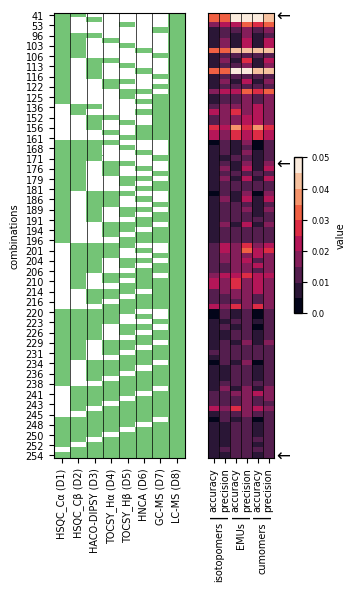

In [30]:
# set font size
plt.rcdefaults
plt.rcParams.update({'font.size': 7})

# create figure and panels
fig, ax = plt.subplots(1, 2, figsize=(3.3, 5.9), dpi=100.0, gridspec_kw={'width_ratios': [1.3, 1]})

# panel 1 (combinations of datasets)
h1 = sns.heatmap(res_num[measurement_methods],
                 cmap=['white', '#74C476'],
                 cbar=False,
                 ax=ax[0],
                 xticklabels=True)

#   add border to heatmap
for _, spine in h1.spines.items():
    spine.set_visible(True)
h1.set_ylabel('combinations')
h1.yaxis.label.set_size(7)

#   add lines between columns
ax[0].vlines(range(len(measurement_methods)), *ax[0].get_ylim(), lw=0.5, colors="black")

# panel 2 (metrics)
data = res_num[metrics_num]
cmap = plt.get_cmap("rocket", 10)
x_axis_labels = ['accuracy', 'precision', 'accuracy', 'precision', 'accuracy', 'precision']
h2 = sns.heatmap(data,
                 cmap=cmap,
                 ax=ax[1],
                 yticklabels=False,
                 xticklabels=x_axis_labels,
                 vmin=0.0,
                 vmax=0.05,
                 cbar_kws={"use_gridspec":False, "location":"right", "pad":0.2, "shrink":0.35})

#   add colorbar (with centered ticks)
c_bar = ax[1].collections[0].colorbar
c_bar.ax.set_ylim(0, 0.05)
c_bar.set_ticks([0., 0.01, 0.02, 0.03, 0.04, 0.05])
c_bar.set_ticklabels([0., 0.01, 0.02, 0.03, 0.04, 0.05])
c_bar.outline.set_linewidth(1)
c_bar.set_label('value')
c_bar.ax.yaxis.label.set_size(7)
c_bar.ax.tick_params(labelsize=6)

#   add lines between columns
ax[1].vlines(range(len(metrics_num)), *ax[1].get_ylim(), lw=0.5, colors="black")

#   add border to heatmap
for _, spine in h2.spines.items():
    spine.set_visible(True)

#   highlight combinations #41, #174 and #254
plt.text(0.8, 0.865, "\u2190", fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.8, 0.615, "\u2190", fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.8, 0.12, "\u2190", fontsize=12, transform=plt.gcf().transFigure)

#   add legend
plt.text(0.612, -0.08, "isotopomers", fontsize=7, transform=plt.gcf().transFigure, rotation=90)
plt.text(0.6, 0.016, "\u2015", fontsize=13, transform=plt.gcf().transFigure)
plt.text(0.679, -0.024, "EMUs", fontsize=7, transform=plt.gcf().transFigure, rotation=90)
plt.text(0.665, 0.016, "\u2015", fontsize=13, transform=plt.gcf().transFigure)
plt.text(0.742, -0.067, "cumomers", fontsize=7, transform=plt.gcf().transFigure, rotation=90)
plt.text(0.73, 0.016, "\u2015", fontsize=13, transform=plt.gcf().transFigure)

# save figure
plt.savefig("./results/Figure_5.jpeg", dpi=300.0, bbox_inches='tight', pad_inches=0.05)

# display figure
plt.show()

## 7. Detailed analysis of integration results for Alanine

This code integrates isotopic measurements collected by NMR and MS for alanine and reproduces Figure 6 of the publication.

Measurements datafile.

In [31]:
dataset_file = "./data/ALA_mapping.tsv"
measurements_file = "./data/ALA_measurements.tsv"

Integrates datasets for combinations 41, 174 and 254.

In [32]:
res_128 = isosolve.main(mm=dataset_file, colsel=[1,2,8], data=measurements_file)
res_12458 = isosolve.main(mm=dataset_file, colsel=[1,2,4,5,8], data=measurements_file)
res_12345678 = isosolve.main(mm=dataset_file, colsel=[1,2,3,4,5,6,7,8], data=measurements_file)

Evaluate consistency of all datasets (combination 254).

In [33]:
display(res_12345678['chi2'])

,Item,Value,Comment
0,number of measurements,21.000000,m
1,system rank (number of statistically defined parameters),7.000000,p
2,degree of freedom,14.000000,dof=m - p
3,χ²(14),4.199899,Σ((estimated-measured)/sd)²<br/>95% confidence interval is [0; 24]
4,χ²(14)/14,0.299993,"Reduced χ², χ²(dof)/dof: if ≫ 1 then poor fitting, ~ 1 means 'good' fitting and ≪ 1 means over-fitting or overestimating sd"
5,"p-value of one-tail χ² test, i.e.<br/>P(χ²(14) > 4.2)",0.994139,Value close to 0 (e.g. under 0.05) means poor fitting. Value close to 1 can be an evidence for over-fitting or that sd are overestimated. It can be NaN (not a number) for dof=0


Calculate theoretical distribution of isotopomers, cumomers and EMUs.

In [34]:
# 13C-enrichment of labeled carbon input with standard deviation
ab_13C, err_13C = 0.508, 0.01

# calculate abundance and standard deviation
ipm_th = get_theoretical_iso(res_128, ab_13C)
ipm_th_sd = get_theoretical_iso_sd(res_128, ab_13C, err_13C)

# calculate abundance and standard deviation for cumomers
cumo_th = get_theoretical_cumo(res_128, ab_13C)
cumo_th_sd = get_theoretical_cumo_sd(res_128, ab_13C, err_13C)

# calculate abundance and standard deviation for EMUs
emu_th = get_theoretical_emu_full(res_128, ab_13C)
emu_th_sd = get_theoretical_emu_full_sd(res_128, ab_13C, err_13C)

# display results
print("Theoretical distributions:")

print("")
for i in range(len(ipm_th)):
    print("isotopomer '{}': {:.3f} \u00B1 {:.3f}".format(res_128['xbc'].index[i], ipm_th[i],
                                                         ipm_th_sd[i]))
print("")

for i in range(len(cumo_th)):
    print("cumomer '{}': {:.3f} \u00B1 {:.3f}".format(list(res_128['cusol'].keys())[i], cumo_th[i], cumo_th_sd[i]))
print("")

for i in res_128['ls']['emu'][0].keys():
    for j in range(len(res_128['ls']['emu'][0][i])):
        print("emu '{}, M{}': {:.3f} \u00B1 {:.3f}".format(i, j, emu_th[i][j], emu_th_sd[i][j]))

Theoretical distributions:

isotopomer '000': 0.119 ± 0.007
isotopomer '001': 0.123 ± 0.005
isotopomer '100': 0.123 ± 0.005
isotopomer '101': 0.127 ± 0.006
isotopomer '010': 0.123 ± 0.005
isotopomer '011': 0.127 ± 0.006
isotopomer '110': 0.127 ± 0.006
isotopomer '111': 0.131 ± 0.008

cumomer '1xx': 0.508 ± 0.010
cumomer 'x1x': 0.508 ± 0.010
cumomer 'xx1': 0.508 ± 0.010
cumomer '11x': 0.258 ± 0.010
cumomer '1x1': 0.258 ± 0.010
cumomer 'x11': 0.258 ± 0.010
cumomer '111': 0.131 ± 0.008

emu 'Exx, M0': 0.492 ± 0.014
emu 'Exx, M1': 0.508 ± 0.014
emu 'xEx, M0': 0.492 ± 0.014
emu 'xEx, M1': 0.508 ± 0.014
emu 'xxE, M0': 0.492 ± 0.014
emu 'xxE, M1': 0.508 ± 0.014
emu 'EEx, M0': 0.242 ± 0.007
emu 'EEx, M1': 0.500 ± 0.028
emu 'EEx, M2': 0.258 ± 0.007
emu 'ExE, M0': 0.242 ± 0.007
emu 'ExE, M1': 0.500 ± 0.028
emu 'ExE, M2': 0.258 ± 0.007
emu 'xEE, M0': 0.242 ± 0.007
emu 'xEE, M1': 0.500 ± 0.028
emu 'xEE, M2': 0.258 ± 0.007
emu 'EEE, M0': 0.119 ± 0.003
emu 'EEE, M1': 0.369 ± 0.031
emu 'EEE, M2': 0.3

Display metrics for combination 41 (HSQC + LC-MS).

In [35]:
combination_41 = {'isotopomer': list(res_128['xbc'].index),
                  'theoretical_fraction': get_theoretical_iso(res_128, ab_13C),
                  'measured_fraction': res_128['ls']['iso'][0].flatten().tolist()[0],
                  'accuracy': [ipm_th[i] - res_128['ls']['iso'][0].flatten().tolist()[0][i] for i in range(len(ipm_th))],
                  'precision': res_128['ls']['iso'][1].flatten().tolist()}  

display(pd.DataFrame(combination_41))

,isotopomer,theoretical_fraction,measured_fraction,accuracy,precision
0,000,0.119095,0.116864,0.002232,0.009354
1,001,0.122969,0.186771,-0.063803,0.065798
2,100,0.122969,0.021316,0.101652,0.082901
3,101,0.126967,0.097768,0.029200,0.039313
4,010,0.122969,0.146504,-0.023535,0.020459
5,011,0.126967,0.146504,-0.019536,0.020459
6,110,0.126967,0.143149,-0.016182,0.020168
7,111,0.131097,0.141125,-0.010028,0.009354


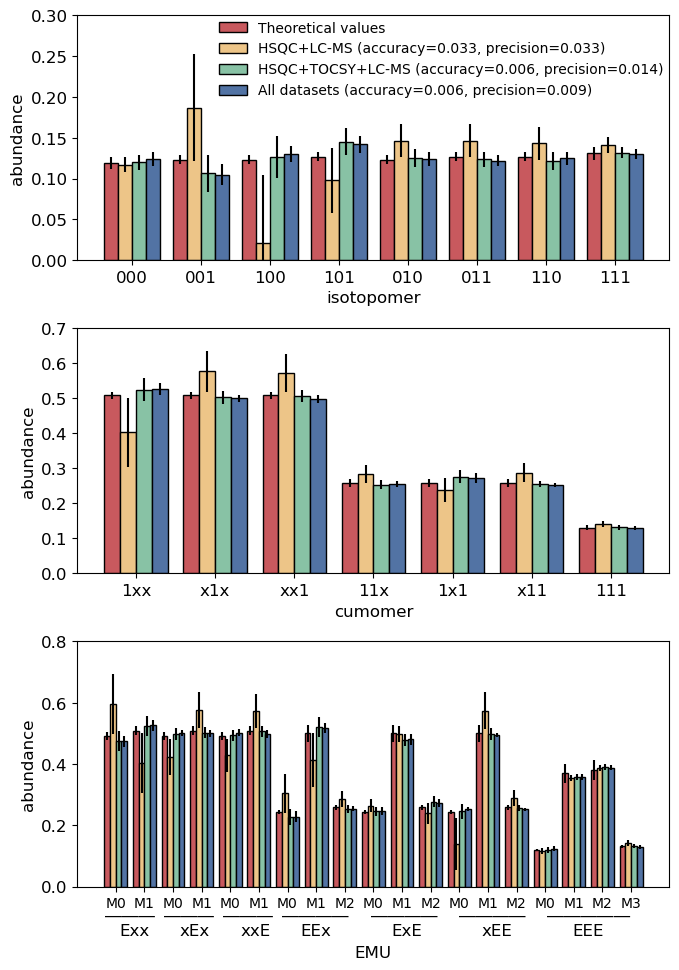

In [36]:
# set font size
plt.rcdefaults
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.labelsize": 12})

# create figure
fig, ax = plt.subplots(3, 1, figsize=(7, 9.9), dpi=100.0)

# plot isotopomers
#   x locations for the groups
ind = np.arange(8)
#   width of the bars
width = 0.2
#   -> theoretical data
p1 = ax[0].bar(ind - width, ipm_th, width, bottom=0, yerr=ipm_th_sd, edgecolor='black', color="#C8595E")
#   -> HSQC + LC-MS
p2 = ax[0].bar(ind, res_128['ls']['iso'][0].flatten().tolist()[0], width, bottom=0, yerr=res_128['ls']['iso'][1].flatten().tolist(), edgecolor='black', color="#EDC588")
#   -> HSQC + GC-MS + LC-MS
p3 = ax[0].bar(ind + width, res_12458['ls']['iso'][0].flatten().tolist()[0], width, bottom=0, yerr=res_12458['ls']['iso'][1].flatten().tolist(), edgecolor='black', color="#88C2A5")
#   -> all datasets
p4 = ax[0].bar(ind + 2*width, res_12345678['ls']['iso'][0].flatten().tolist()[0], width, bottom=0, yerr=res_12345678['ls']['iso'][1].flatten().tolist(), edgecolor='black', color="#5273A4")
#   set y limits
ax[0].set(ylim=(0.,0.3))
#   add ticks
ax[0].set_xticks(ind + width / 2)
#   add labels
ax[0].set_xticklabels(res_128['xbc'].index)
#   add legend
ax[0].legend((p1[0], p2[0], p3[0], p4[0]),
             ('Theoretical values',
              'HSQC+LC-MS (accuracy=0.033, precision=0.033)',
              'HSQC+TOCSY+LC-MS (accuracy=0.006, precision=0.014)',
              'All datasets (accuracy=0.006, precision=0.009)'),
              loc='upper right', borderaxespad=0., framealpha=1., frameon=False, fontsize=10)
#   add axis labels
ax[0].set(xlabel='isotopomer', ylabel='abundance')

# plot cumomers
#   x locations for the groups
ind = np.arange(7)
#   width of the bars
width = 0.2
#   -> theoretical data
p1 = ax[1].bar(ind - width, cumo_th, width, bottom=0, yerr=cumo_th_sd, edgecolor='black', color="#C8595E")
#   -> HSQC + LC-MS
p2 = ax[1].bar(ind, res_128['ls']['cumo'][0], width, bottom=0, yerr=res_128['ls']['cumo'][1], edgecolor='black', color="#EDC588")
#   -> HSQC + GC-MS + LC-MS
p3 = ax[1].bar(ind + width, res_12458['ls']['cumo'][0], width, bottom=0, yerr=res_12458['ls']['cumo'][1], edgecolor='black', color="#88C2A5")
#   -> all datasets
p4 = ax[1].bar(ind + 2*width, res_12345678['ls']['cumo'][0], width, bottom=0, yerr=res_12345678['ls']['cumo'][1], edgecolor='black', color="#5273A4")
#   set y limits
ax[1].set(ylim=(0.,0.7))
#   add ticks
ax[1].set_xticks(ind + width / 2)
#   add labels
ax[1].set_xticklabels(res_128['cusol'].keys())
#   add axis labels
ax[1].set(xlabel='cumomer', ylabel='abundance')

# plot EMUs
def transform_emu(d):
    l, n = [], []
    for k,v in d.items():
        for i,j in enumerate(v):
            l.append(j)
            n.append(k + "_M" + str(i))
    return (n, l)
#   get theoretical EMUs 
r_th = transform_emu(emu_th)
#   x locations for the groups
ind = np.arange(len(r_th[0]))
#   width of the bars
width = 0.2
#   -> theoretical data
p1 = ax[2].bar(ind - width, transform_emu(emu_th)[1], width, bottom=0, yerr=transform_emu(emu_th_sd)[1], edgecolor='black', color="#C8595E")
#   -> HSQC + LC-MS
p2 = ax[2].bar(ind, transform_emu(res_128['ls']['emu'][0])[1], width, bottom=0, yerr=transform_emu(res_128['ls']['emu'][1])[1], edgecolor='black', color="#EDC588")
#   -> HSQC + GC-MS + LC-MS
p3 = ax[2].bar(ind + width, transform_emu(res_12458['ls']['emu'][0])[1], width, bottom=0, yerr=transform_emu(res_12458['ls']['emu'][1])[1], edgecolor='black', color="#88C2A5")
#   -> all datasets
p4 = ax[2].bar(ind + 2*width, transform_emu(res_12345678['ls']['emu'][0])[1], width, bottom=0, yerr=transform_emu(res_12345678['ls']['emu'][1])[1], edgecolor='black', color="#5273A4")
#   set y limits
ax[2].set(ylim=(0.,0.8))
#   add ticks
ax[2].set_xticks(ind + width / 2)
#   add labels
xlabels = [i.split("_")[1] for i in transform_emu(res_12458['ls']['emu'][0])[0]]
ax[2].set_xticklabels(xlabels, fontsize=10)
#   add axis labels
ax[2].set(ylabel='abundance')
plt.xlabel(xlabel='EMU', labelpad=25)
lemus = [i.split("_")[0] for i in transform_emu(res_12458['ls']['emu'][0])[0]]
xemus =  [(x, lemus.count(x)) for i, x in enumerate(lemus) if i == lemus.index(x)]
i=0
for e in xemus:
    ax[2].text(0.18+i/len(lemus)*0.82, 0.048, e[0], fontsize=12, transform=plt.gcf().transFigure)
    ax[2].text(0.16+i/len(lemus)*0.8, 0.063, "\u2015"*(e[1]+1), fontsize=12, transform=plt.gcf().transFigure)
    i += e[1]

# adjust space between panels
fig.tight_layout(pad=1.0)

# save figure
plt.savefig("./results/Figure_6.jpeg", dpi=300.0, bbox_inches='tight', pad_inches=0.05)

# display figure
plt.show()

## 8. Evaluate self-consistency of measurements

This code evaluates the self-consistency of different datasets to consolidate measurements and identify biased datasets.

Define mapping and measurements datafiles.

In [37]:
dataset_file = "./data/ALA_mapping.tsv"
measurements_file = "./data/ALA_measurements.tsv"

Integrate measurements and evaluate the consistency of the different datasets based on chi2 statistics.

In [38]:
res_all = isosolve.main(mm=dataset_file, colsel=[1,2,3,4,5,6,7,8], data=measurements_file)
display(res_all['chi2'])

,Item,Value,Comment
0,number of measurements,21.000000,m
1,system rank (number of statistically defined parameters),7.000000,p
2,degree of freedom,14.000000,dof=m - p
3,χ²(14),4.199899,Σ((estimated-measured)/sd)²<br/>95% confidence interval is [0; 24]
4,χ²(14)/14,0.299993,"Reduced χ², χ²(dof)/dof: if ≫ 1 then poor fitting, ~ 1 means 'good' fitting and ≪ 1 means over-fitting or overestimating sd"
5,"p-value of one-tail χ² test, i.e.<br/>P(χ²(14) > 4.2)",0.994139,Value close to 0 (e.g. under 0.05) means poor fitting. Value close to 1 can be an evidence for over-fitting or that sd are overestimated. It can be NaN (not a number) for dof=0


Now we alter two measurements ('b' and 'c') in the measurements file.

In [39]:
biased_measurements = pd.read_csv(measurements_file, delimiter="\t", comment="#")
biased_measurements.at[1, 'value'] = biased_measurements.at[1, 'value'] - 0.2
biased_measurements.at[2, 'value'] = biased_measurements.at[2, 'value'] + 0.2
display(biased_measurements)

,name,value,sd
0,a,0.253300,0.02
1,b,0.053300,0.02
2,c,0.447500,0.02
3,d,0.244000,0.02
4,e,0.509600,0.03
5,f,0.490400,0.03
6,g,0.116864,0.01
7,h,0.354591,0.01
8,i,0.387421,0.01
9,j,0.141125,0.01


Data integration indicates that the altered datasets are not self-consistent (p(chi2) < 0.05).

In [40]:
res_biased = isosolve.main(mm=dataset_file, colsel=[1,2,3,4,5,6,7,8], data=biased_measurements)
display(res_biased['chi2'])

,Item,Value,Comment
0,number of measurements,2.100000e+01,m
1,system rank (number of statistically defined parameters),7.000000e+00,p
2,degree of freedom,1.400000e+01,dof=m - p
3,χ²(14),1.066792e+02,Σ((estimated-measured)/sd)²<br/>95% confidence interval is [0; 24]
4,χ²(14)/14,7.619945e+00,"Reduced χ², χ²(dof)/dof: if ≫ 1 then poor fitting, ~ 1 means 'good' fitting and ≪ 1 means over-fitting or overestimating sd"
5,"p-value of one-tail χ² test, i.e.<br/>P(χ²(14) > 106.679)",2.220446e-16,Value close to 0 (e.g. under 0.05) means poor fitting. Value close to 1 can be an evidence for over-fitting or that sd are overestimated. It can be NaN (not a number) for dof=0


## 9. Generate isotopically-resolved InChIs

The [IUPAC International Chemical Identifier](https://iupac.org/who-we-are/divisions/division-details/inchi/) (InChI) is a textual identifier for chemical substances, designed to provide a standard way to encode molecular information and to facilitate the search for such information in databases and on the web.

The identifiers describe chemical substances in terms of layers of information. IsoSolve may generate an isotopic layer that specifies the isotopic species of the tracer element, following the extended representation proposed by the [InChI Isotopologue and Isotopomer Development Team](https://github.com/MSI-Metabolomics-Standards-Initiative/inchi-isotopologue-extension)

To generate isotopic layers of InChIs, use `isosolve.main(..., inchi=True)`, as shown here for Alanine.

Define mapping and measurements datafiles.

In [41]:
dataset_file = "./data/ALA_mapping.tsv"
measurements_file = "./data/ALA_measurements.tsv"

Integrate measurements and display isotopic layers for isotopomers, cumomers, and EMUs.

In [42]:
res_all = isosolve.main(mm=dataset_file, colsel=[1,2,3,4,5,6,7,8], inchi=True)
print("Isotopic layers of isotopomers:")
display(res_all['inchi']['iso'])
print("Isotopic layers of cumomers:")
display(res_all['inchi']['cumo'])
print("Isotopic layers of EMUs:")
display(res_all['inchi']['emu'])

Isotopic layers of isotopomers:


,inchi
000,"/i1+0,2+0,3+0"
001,"/i1+0,2+0,3+1"
100,"/i1+1,2+0,3+0"
101,"/i1+1,2+0,3+1"
010,"/i1+0,2+1,3+0"
011,"/i1+0,2+1,3+1"
110,"/i1+1,2+1,3+0"
111,"/i1+1,2+1,3+1"


Isotopic layers of cumomers:


,inchi
1xx,/i1+1
x1x,/i2+1
xx1,/i3+1
11x,"/i1+1,2+1"
1x1,"/i1+1,3+1"
x11,"/i2+1,3+1"
111,"/i1+1,2+1,3+1"


Isotopic layers of EMUs:


,inchi
Exx+0,"/a(C1+0,1)"
Exx+1,"/a(C1+1,1)"
xEx+0,"/a(C1+0,2)"
xEx+1,"/a(C1+1,2)"
xxE+0,"/a(C1+0,3)"
xxE+1,"/a(C1+1,3)"
EEx+0,"/a(C2+0,1,2)"
EEx+1,"/a(C1+1,1,2)"
EEx+2,"/a(C2+1,1,2)"
ExE+0,"/a(C2+0,1,3)"


When measurements are provided as input, the integration results are provided for each isotopic InChI.

In [43]:
res_all = isosolve.main(mm=dataset_file, colsel=[1,2,3,4,5,6,7,8], data=measurements_file, inchi=True)
display(res_all['inchi']['iso'])
display(res_all['inchi']['cumo'])
display(res_all['inchi']['emu'])
display(res_all['inchi']['mcomb'])

,inchi,value,sd
000,"/i1+0,2+0,3+0",0.123579,0.008452
001,"/i1+0,2+0,3+1",0.104716,0.012772
100,"/i1+1,2+0,3+0",0.129994,0.010114
101,"/i1+1,2+0,3+1",0.141941,0.010580
010,"/i1+0,2+1,3+0",0.123621,0.008616
011,"/i1+0,2+1,3+1",0.121670,0.006702
110,"/i1+1,2+1,3+0",0.124574,0.007433
111,"/i1+1,2+1,3+1",0.129905,0.005822


,inchi,value,sd
1xx,/i1+1,0.526414,0.017891
x1x,/i2+1,0.499770,0.010169
xx1,/i3+1,0.498232,0.012152
11x,"/i1+1,2+1",0.254479,0.008186
1x1,"/i1+1,3+1",0.271846,0.013694
x11,"/i2+1,3+1",0.251574,0.006063
111,"/i1+1,2+1,3+1",0.129905,0.005822


,inchi,value,sd
Exx+0,"/a(C1+0,1)",0.473586,0.017891
Exx+1,"/a(C1+1,1)",0.526414,0.017891
xEx+0,"/a(C1+0,2)",0.500230,0.010169
xEx+1,"/a(C1+1,2)",0.499770,0.010169
xxE+0,"/a(C1+0,3)",0.501768,0.012152
xxE+1,"/a(C1+1,3)",0.498232,0.012152
EEx+0,"/a(C2+0,1,2)",0.228296,0.016769
EEx+1,"/a(C1+1,1,2)",0.517225,0.016368
EEx+2,"/a(C2+1,1,2)",0.254479,0.008186
ExE+0,"/a(C2+0,1,3)",0.247200,0.012105


,accu,group,inchi,value,sd
0,000,i1,"/i1+0,2+0,3+0",0.123579,0.008452
1,001,i2,"/i1+0,2+0,3+1",0.104716,0.012772
2,100,i3,"/i1+1,2+0,3+0",0.129994,0.010114
3,101,i4,"/i1+1,2+0,3+1",0.141941,0.010580
4,010,i5,"/i1+0,2+1,3+0",0.123621,0.008616
5,011,i6,"/i1+0,2+1,3+1",0.121670,0.006702
6,110,i7,"/i1+1,2+1,3+0",0.124574,0.007433
7,111,i8,"/i1+1,2+1,3+1",0.129905,0.005822


When the system is partly undetermined, IsoSolve provides InChIs for all species and numerical values only for the identifiable species.

In [44]:
res_partial = isosolve.main(mm=dataset_file, colsel=[1,4,8], data=measurements_file, inchi=True)
display(res_partial['inchi']['iso'])
display(res_partial['inchi']['cumo'])
display(res_partial['inchi']['emu'])
display(res_partial['inchi']['mcomb'])

,inchi,value,sd
000,"/i1+0,2+0,3+0",0.119806,0.009268
001,"/i1+0,2+0,3+1",NaN,NaN
100,"/i1+1,2+0,3+0",NaN,NaN
101,"/i1+1,2+0,3+1",0.143343,0.018438
010,"/i1+0,2+1,3+0",0.124975,0.011181
011,"/i1+0,2+1,3+1",0.124975,0.011181
110,"/i1+1,2+1,3+0",0.122045,0.011113
111,"/i1+1,2+1,3+1",0.132297,0.007282


,inchi,value,sd
1xx,/i1+1,NaN,NaN
x1x,/i2+1,0.504293,0.021176
xx1,/i3+1,NaN,NaN
11x,"/i1+1,2+1",0.254342,0.013399
1x1,"/i1+1,3+1",0.275640,0.018735
x11,"/i2+1,3+1",0.257273,0.013480
111,"/i1+1,2+1,3+1",0.132297,0.007282


,inchi,value,sd
Exx+0,"/a(C1+0,1)",NaN,NaN
Exx+1,"/a(C1+1,1)",NaN,NaN
xEx+0,"/a(C1+0,2)",0.495707,0.021176
xEx+1,"/a(C1+1,2)",0.504293,0.021176
xxE+0,"/a(C1+0,3)",NaN,NaN
xxE+1,"/a(C1+1,3)",NaN,NaN
EEx+0,"/a(C2+0,1,2)",NaN,NaN
EEx+1,"/a(C1+1,1,2)",NaN,NaN
EEx+2,"/a(C2+1,1,2)",0.254342,0.013399
ExE+0,"/a(C2+0,1,3)",0.244782,0.014480


,accu,group,inchi,value,sd
0,000,i1,"/i1+0,2+0,3+0",0.119806,0.009268
1,101,i2,"/i1+1,2+0,3+1",0.143343,0.018438
2,010,i3,"/i1+0,2+1,3+0",0.124975,0.011181
3,011,i4,"/i1+0,2+1,3+1",0.124975,0.011181
4,110,i5,"/i1+1,2+1,3+0",0.122045,0.011113
5,111,i6,"/i1+1,2+1,3+1",0.132297,0.007282
